## 8 JetRail高铁的乘客数量预测

数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集

### 8.1 数据预处理

#### 8.1.1 加载数据 

In [3]:
import pandas as pd
import numpy as np

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
# 数据加载
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print(train.head())
print(test.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00


#### 8.1.2 将时间字段转换为 datetime类型

In [4]:
# 将时间字段转换为 datetime类型
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [5]:
test

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00
...,...,...
5107,23395,2015-04-26 19:00:00
5108,23396,2015-04-26 20:00:00
5109,23397,2015-04-26 21:00:00
5110,23398,2015-04-26 22:00:00


#### 8.1.3 将Datatime作为train的索引

In [6]:
# 将Datatime作为train的索引
train.index = train.Datetime
test.index = test.Datetime
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [7]:
test

,ID,Datetime
Datetime,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00
2014-09-26 01:00:00,18289,2014-09-26 01:00:00
2014-09-26 02:00:00,18290,2014-09-26 02:00:00
2014-09-26 03:00:00,18291,2014-09-26 03:00:00
2014-09-26 04:00:00,18292,2014-09-26 04:00:00
...,...,...
2015-04-26 19:00:00,23395,2015-04-26 19:00:00
2015-04-26 20:00:00,23396,2015-04-26 20:00:00
2015-04-26 21:00:00,23397,2015-04-26 21:00:00


#### 8.1.4 # 去掉ID,Datetime字段

In [8]:
# 去掉ID,Datetime字段
train.drop(['ID','Datetime'], axis = 1, inplace = True)
test.drop(['ID','Datetime'], axis = 1, inplace = True)

In [9]:
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [10]:
test

""
Datetime
2014-09-26 00:00:00
2014-09-26 01:00:00
2014-09-26 02:00:00
2014-09-26 03:00:00
2014-09-26 04:00:00
...
2015-04-26 19:00:00
2015-04-26 20:00:00
2015-04-26 21:00:00


#### 8.1.5 # 按天进行采样

In [11]:
# 按天进行采样
daily_train = train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [12]:
from fbprophet import Prophet

In [13]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)

In [14]:
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


### 8.2 拟合Prophet模型

In [15]:
#拟合Prophet模型
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 8.3 预测

In [ ]:
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

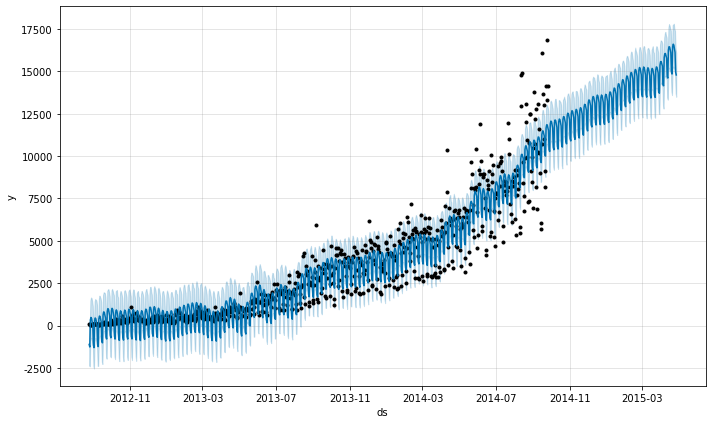

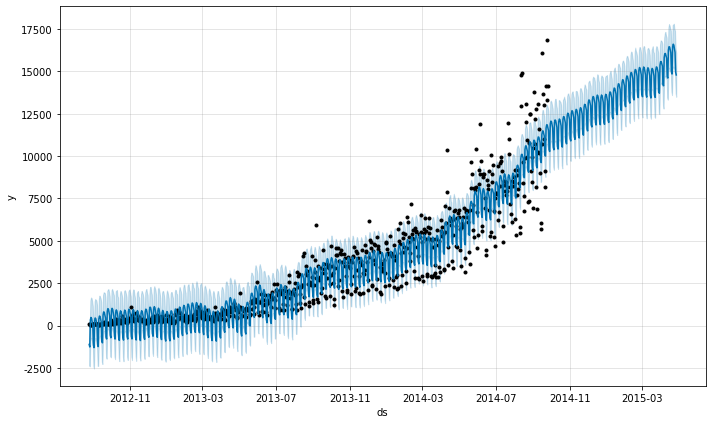

In [17]:
m.plot(forecast)

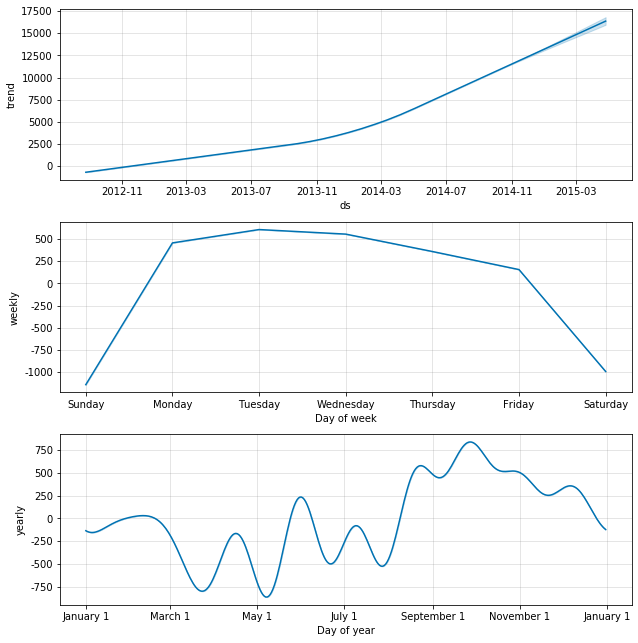

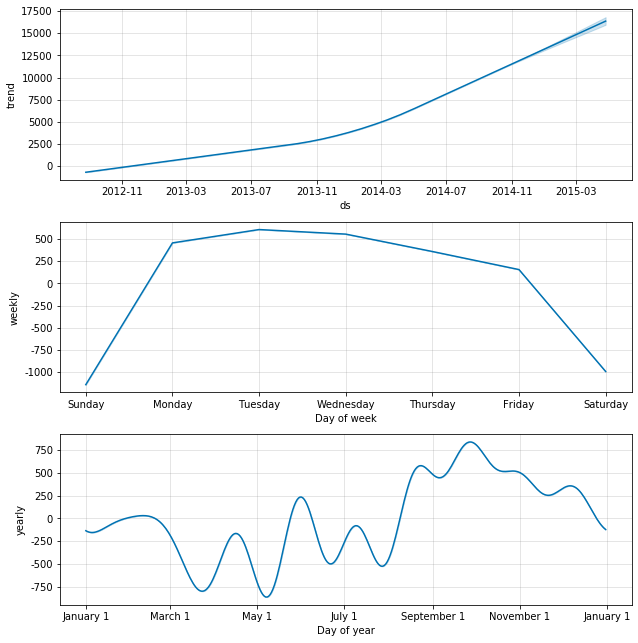

In [18]:
# 查看各个成分
m.plot_components(forecast)